<a href="https://colab.research.google.com/github/GeorgeThan414/Machine_Learning_CSD/blob/main/Ergasia1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Εργασία 1 - Επιβλεπόμενη Μάθηση
Μέρος 1 - Λογιστική Παλινδρόμηση


Το πρώτο κελί αφορά τη φόρτωση όλων των κατάλληλων βιβλιοθηκών, για την ολοκλήρωση της εργασίας. H βιβλιοθήκη **pandas**, αφορά την φόρτωση, επερξεργασία δεδομένων, καθώς και την στατιστική που ακολουθούν. Η βιβλιοθήκη **numpy** αφορά τον μετασχηματισμό των δεδομένων σε πίνακες, με σκοπό την αξιοποίηση τους σε αριθμιτικές πράξεις όπως πρόσθεση, πολλαπλασιασμός και διαίρεση που είναι απαραίτητες για τη μηχανική μάθηση. Επιπλέον, η βιβλιοθήκη **matplotlib** αφορά την απεικόνιση των δεδομένων και τη δυνατότητα χρήσης πολλαπλών και διαφορετικών διαγραμματών. Τέλος, η βιβλιοθήκη **scikit-learn (sklear)**, αποτελεί ίσως την σημαντικότερη και δημοφιλέστερη βιβλιοθήκη που προσφέρει μοντέλα μηχανικής μάθησης, με σκοπό την αξιοποίησή τους σε διαφορετικά projects και διαφορετικά δεδομένα.


In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


**Ερώτημα 1 - Μέρος 1**

Μέσω την βιβλιοθήκη pandas που αναφέρθηκε προηγουμένως θα φορτωθούν τα δεδομένα σε μορφή DataFrame. Υπάρχουν πολλαπλοί τρόποι ανεβάσματος δεδομένων, στην συγκεκριμένη περίπτωση θα κατεβάσουμε το dataset και το φορτώσουμε στα files με drag & drop.

Το παρακάτω κελί φορτώνει τα δεδομένα με την εντολή **pd.read_csv** και εκτυπώνουμε τα πρώτα 10 με την εντολή **df.head(10)**, όπου το df είναι το dataframe object που δημιουργήσαμε πρίν.

In [ ]:
df=pd.read_csv("diabetes.csv")
df.head(10)



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Με την εντολή **df.describe()**, εκτυπώνονται όλες οι βασικές στατιστικές ιδιότητες, όπως **η μέση τιμή (mean), η τυπική απόκλιση(std) καθώς και η ελάχιστη(min) και μέγιστη(max) τιμή τους**, όλων των διαφορετικών χαρακτηριστικών του csv μας.

In [ ]:
print(df.describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

Στη συνέχεια εμφανίζεται το ιστόγραμμα, όλων των διαφορικών χαρακτηριστικών, που μας δείχνει την διακύμανση των δεδομένων στον άξωνα x(axis=0), ή το πόσο πυκνά είναι τα δεδομένα κάθε χαρακτηριστικού. Δηλαδή, αν σε κάποιο χαρακτηριστικό τα δεδομένα έχουν πολύ κοντινές τιμές ή πολλαπλά σημεία έχουν ίδια τιμή, αυτό σημαίνει ότι έχουν μικρή μεταβλητότητα στην τιμή τους και το ιστόγραμμα θα έχει μία κορυφή (peak) στην συγκεκριμένη τιμή. Συνολίκα έχουμε 9 χαρακτηριστικά, θα δείξουμε 8 διαφορετικά ιστογράμματα και το χαρακτηριστικό στόχου θα το απεικονίσουμε με barplot.

Παραkάτω απεικοίνίζονται τα 8 διαφορετικά ιστογράμματα, για λόγους απλότητα, μία for loop με 8 επαναλήψεις(iterations), που σε κάθε επανάληψη τοποθετεί ένα διαφορετικό χαρακτηριστικό σε συγκεκριμένη θέση του αντικειμένου subplot που θα απεικονίση συνολικά όλα τα ιστογράμματα σε 3 σειρές και 3 στείλες.

Έπειτα, η μεταβλητή target που αποτελείται μόνο από δύο τιμές το 0 και το 1 θα εμφανιστεί με ένα Bar Plot.

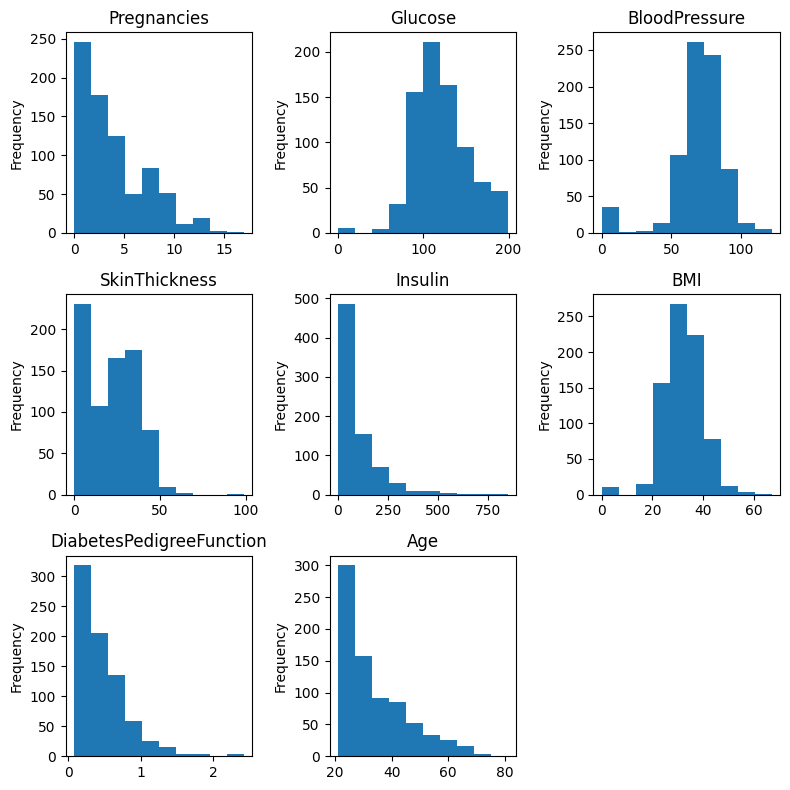

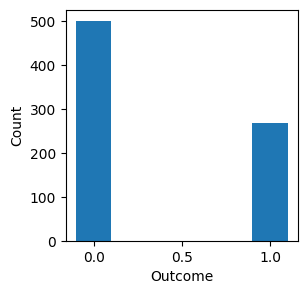

In [ ]:
plt.figure(figsize=(8,8))                   # Visualized Object Size
for index in range(8):
  plt.subplot(3,3, index+1)                 # Total rows/columns of the object
  plt.hist(df.iloc[:, index])               # Each row and column depicts exactly one feature.
  plt.ylabel("Frequency")                   # Y label for all the visualizations
  plt.title(df.columns[index])              # Correlate the name of the feature with each subplot position.

plt.tight_layout()                          # Avoid overlap between subplots
plt.show()                                  # Depicts the subplots.

plt.figure(figsize=(3,3))
counts= df['Outcome'].value_counts()        # Count the total values of the feature
plt.bar(counts.index, counts, width=0.2)    # Create a bar plot with the counts and with specified width of the bar plots
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()                                   # Depicts the plot.



**Ερώτημα 2**

Όπως αναφέρθηκε και προηγουμένως, το ιστόγραμμα κάθε μεταβλητής απεικονίζει και την κατανομή που ακολουθεί το συγκεκριμένο χαρακτηστικό, από την συγκέντρωση των δειγμάτων του. Σύφμωνα με τα παραπάνω ιστογράμμα μπορούμε να αντιληφθούμε εμπειρικά την διακύμανση των δεδομένων κάθε χαρακτηριστικού αλλά και αριθμιτικά αν υψώσουμε στο τετράγωνο την τυπική απόκλιση κάθε χαρακτηστικού. **Επομένως, όσο μεγαλύτερη διακύμανση τόσο πιο αραιά τα δεδομένα στο ιστόγραμμα, άρα περισσότερη πληροφορία που μπορεί να αξιοποιηθεί από το μοντέλο. Διαφορετικά οι μεταβλητές με μεγαλύτερη ασσυμετρία και απότομες κορυφές(skewness) δεν παρουσιάζουν μεγάλη διακύμανση, διότι το πλήθος των τιμών τους περιορίζεται σε ένα μικρό διάστημα τιμών, με συνέπεια το μοντέλο να μπορεί να μάθει σχεδόν απέξω την η τιμή του χαρακτηριστικού ότι είναι η τιμή με τα περισσότερα δείγματα, απομακρύνοντας το μοντέλο από την γενίκευση και ομαλή εκπαίδευση.**

**Ο δεύτερος λόγος** αφορά το χαρακτηριστό στόχου (target=Outcome), το οποίο σύμφωνα με το παραπάνω διάγραμμα μας δείχνει την ανισορροπία των δύο διαφορετικών κλάσεων 0(χωρίς διαβήτη) και 1(με διαβήτη), αφού το 65% των δειγμάτων ταξινομούνται στην κλάση 0, ενώ τα υπόλοιπα στην κλάση 1. Με αποτέλεσμα να δημιουργείται μια μεροληψία των δεδομένων (bias) συγκεκριμένα σε μοντέλα ταξινόμησης, όπως είναι και η παλιδρομηκή ταξινόμηση, τα οποία να τείνουν να προβλέπουν συχνότερα την κλάση με τα περισσότερα δείγματα.

**Συμπερασματικα, και δεδομένου του παρακάτω πίνακος, ο οποίος μας δείχνει τον συνολικό αριθμο μηδενικών στα χαρακτηριστικά, δηλαδή μετρήσεις με μηδενικές τιμές, που δεν ανταποκρίνονται στην πραγματικότητα. Παραδείγματος χάρη η αρτηριακή πίεση στο αίμα έχει 35 μηδενικές τιμές. Έτσι, καταλήγουμε στο συμπέρασμα ότι το σετ δεδομένων δεν αποτελείται από ποιοτικές τιμές.**

In [ ]:
(df==0).sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


**Ερώτημα 3**

Η κατανομή της μεταβλητής Age είναι δεξιά λοξή (right-skewed) το οποίο επιβεβαιώνεται αφού η διάμεσος (**median=29.000000**) είναι μικρότερη από τη μέση τιμή (**mean= 33.240885**). Επίσης, δεν υπάρχει μεγάλη τυπική απόκλιση (**std=11.760232**), και το μεγαλύτερο πλήθος των δεδομένων βρίσκεται σε άτομα μεταξύ των 20-40 ετών και αρκετά λιγότερα δεδομένα σε άτομα 60 ετών. Συνεπώς, δεν είναι καλή κατανομή για την κατασκευή της συγκεκριμένης εφαρμογής, διότι θα έπρεπε τα δείγματα να είναι ισοκατανεμημένα στις διαφορετικές ηλικίες.

**Ερώτημα 4**

Ένας δείκτης αξιολόγησης των κλινικών μελετών, αποτελεί η σύγκριση των δειγμάτων του χαρακτηριστικού της γλυκόζης μεταξύ των δύο κλάσεων. **Συνεπώς θα υπολογιστεί η μέση τιμή των δειγμάτων της γλυκόζης που έχουν οδηγήσει σε στην κλάση 0 και η μέση τιμή των δειγμάτων της γλυκόζης που έχουν οδηγήσει σε στην κλάση 1. Αν η μέση τιμή των δειγμάτων της γλυκόζης στην κλάση 1 είναι μεγαλύτερη, τότε τα δεδομένα συνάδουν με το αποτέλεσμα της κλινικής μελέτης.**

Το παρακάτω κελί κώδικα απεικονίζει αυτές τις μέσες τιμές, οι οποίες μας οδηγούν στην εγκυρότητα του αποτελέσματος των κλινικών μελετών. Δηλαδή ότι ασθενείς με διαβήτη έχουν σημαντικά υψηλότερη μέση τιμή γλυκόζης.


In [ ]:
df.groupby('Outcome')['Glucose'].mean()

,Glucose
Outcome,
0,109.980000
1,141.257463


**Ερώτημα 5**

In [ ]:
# Split the Dataset to inputs(x) and targets(y)
inputs_df= df.drop(columns='Outcome')
targets_df=df['Outcome']


# Convert the above dataframe objects to numpy arrays
x=inputs_df.to_numpy()
y=targets_df.to_numpy()
x.shape, y.shape


((768, 8), (768,))

Χωρισμός των παραπάνω πινάκων σε σύνολα εκπαίδευσης και επικύρωσης (training, validation)

In [ ]:
# Define a random seed
seed=0
# Split the data to 70-30
split_size=0.3

X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=split_size, random_state=seed)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape        #Print the shape of each array

((537, 8), (231, 8), (537,), (231,))

**Ερώτημα 6**

In [ ]:
# Load and use the Logistic Regression Model
model=LogisticRegression(max_iter=1000, random_state=seed)
# Fit the model to the train set.
model.fit(X_train, y_train)
# Calculate the accuracy in the TRAIN set with seed=0
X_train_predictions= model.predict(X_train)
accuracy_of_training=accuracy_score(y_train,X_train_predictions)
print(f"Accuracy of the model in Train set: {accuracy_of_training*100:.2f}%")


Accuracy of the model in Train set: 76.54%


**Accuacy of the model in Test set**

In [ ]:
# Calculate the Accuracy of the model in the test(validation) set.
# In order to calculate the accuracy we need to fit the trained classifier to x_test.
# Then to print the accuracy score of the model.
predictions= model.predict(X_valid)
print(predictions.shape, y_valid.shape)   # Predictions must have the same samples as the y_valid (231,) for the calculation of the accuracy score
accuracy= accuracy_score(y_valid, predictions)
print(f"Accuracy of the model in Test set:: {accuracy*100:.2f}%")

(231,) (231,)
Accuracy of the model in Test set:: 77.92%


Η ακρίβεια του μοντέλου στο τεστ σετ είναι **μεγαλύτερη περίπου κατα 1.5%**, το οποίο σημαίνει ότι το μοντέλο έχει συγκλίσει και εκπαιδευτεί σωστά, εφόσον μπορεί να γενικεύση σε καινούρια δείγματα με καλύτερη απόδοση.

**Ερώτημα 7**

Παρουσίαση ραβδογράμματος σε διαφορετικές ηλικίες, ώστε να αξιολογηθεί η επίδοση του ταξινομητή σε 3 διαφορετικά ηλικιακά γρουπς.

Το επόμενο κελί δημιουργεί ένα καινούριο DataFrame, περιλαμβάνοντας το Age, Predicted & Actual values.


In [ ]:
# Create a new Dataframe with the three columns: Age, Predictions, Actual values
results= pd.DataFrame({
    "Predicted Values": predictions,
    "Actual Values": y_valid
})
results['Age'] = df.loc[results.index, 'Age']
results= results[['Age', 'Predicted Values', 'Actual Values']]
results


,Age,Predicted Values,Actual Values
0,50,1,1
1,31,0,0
2,32,0,0
3,21,1,1
4,33,0,0
...,...,...,...
226,26,0,1
227,24,0,1
228,31,0,0
229,24,0,0


Στη συνέχεια στο προηγούμενο DataFrame, προσθέτουμε ακόμη μία στήλη που ομαδοποιεί τα δεδομένα μας σε τρεις διαφορετικές ηλικιακές ομάδες.

In [ ]:
# Group by [0-25] , [25-50], [50- max] , And create a new column in results dataframe
labels = ['0-25', '25-50', '50+']
bins = [0, 25, 50, results['Age'].max()]                                # Define the bins: this creates three intervals based on labels.
results['AgeGroup'] = pd.cut(results['Age'], bins=bins, labels=labels)  # Takes each numeric value from column Age and categorized according to the bin
results

,Age,Predicted Values,Actual Values,AgeGroup
0,50,1,1,25-50
1,31,0,0,25-50
2,32,0,0,25-50
3,21,1,1,0-25
4,33,0,0,25-50
...,...,...,...,...
226,26,0,1,25-50
227,24,0,1,0-25
228,31,0,0,25-50
229,24,0,0,0-25


Χωρίζουμε το DataFrame, σε τρία διαφορετικά DataFrames, στα οποία αποθηκεύουμε σε λίστες τα predictions & actual values, για το κάθε ηλικιακό γκρουπ, έπειτα υπολογίζουμε την απόδοσή τους, και απεικονίζουμε ένα barplot για τις τρεις διαφορετικές κλάσεις. **Η συνολική ακρίβεια του μοντέλου καθορίζεται από το άθροισμα των τριών ακριβειών  των τριών κλάσεων και διαιρείται με το 3. Αυτη η τιμή πρέπει να είναι σχεδόν ίδια, με την ακρίβεια που βρήκαμε στο x_valid, δηλαδή στο τεστ δεδομένων.**

Παρατηρούμαι ότι η διαφορά τους:
Accuracy of the model in Test set:: 77.92%
Accuracy = (66.22 + 88 + 82.58) /3 = 78%  
Η ελάχιστη διαφορά τους οφείλεται στη απλοποίηση των αριθμών μετά την υποδιαστολή.

    Age  Predicted Values  Actual Values AgeGroup
3    21                 1              1     0-25
27   22                 1              0     0-25
32   22                 0              0     0-25
45   25                 0              0     0-25
47   22                 0              1     0-25
    Age  Predicted Values  Actual Values AgeGroup
0   50                 1              1    25-50
1   31                 0              0    25-50
2   32                 0              0    25-50
4   33                 0              0    25-50
5   30                 0              0    25-50
     Age  Predicted Values  Actual Values AgeGroup
8    53                 0              0      50+
9    54                 0              0      50+
12   57                 0              0      50+
13   59                 0              0      50+
14   51                 0              0      50+

Accuracy of group 0-25: 66.22%
Accuracy of group 25-50: 82.58%
Accuracy of group 50+: 88.00%



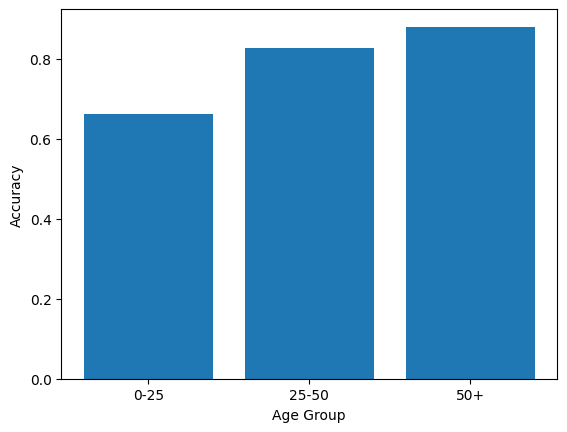

In [ ]:
# Split results dataframe to three different dataframes
group_0_25 = results[results['AgeGroup'] == '0-25']
group_25_50 = results[results['AgeGroup'] == '25-50']
group_50_plus = results[results['AgeGroup'] == '50+']

# Print the dataframes
print(f"{group_0_25.head()}\n",
      f"{group_25_50.head()}\n",
      f"{group_50_plus.head()}\n")

# Create two lists for each Predicted Values and Actual Values for each dataframe, so in total 6 lists
#group_0_25
predicted_values_0_25 = group_0_25['Predicted Values'].tolist()
actual_values_0_25 = group_0_25['Actual Values'].tolist()

#group_25_50
predicted_values_25_50 = group_25_50['Predicted Values'].tolist()
actual_values_25_50 = group_25_50['Actual Values'].tolist()

#group_50_plus
predicted_values_50_plus = group_50_plus['Predicted Values'].tolist()
actual_values_50_plus = group_50_plus['Actual Values'].tolist()

# Calculate the accuracy of each group
accuracy_score_0_25 = accuracy_score(actual_values_0_25, predicted_values_0_25)
accuracy_score_25_50 = accuracy_score(actual_values_25_50, predicted_values_25_50)
accuracy_score_50_plus = accuracy_score(actual_values_50_plus, predicted_values_50_plus)

# Print the three accuracies
print(f"Accuracy of group 0-25: {accuracy_score_0_25*100:.2f}%")
print(f"Accuracy of group 25-50: {accuracy_score_25_50*100:.2f}%")
print(f"Accuracy of group 50+: {accuracy_score_50_plus*100:.2f}%")
print("")

#Visualize the three different accuracies
plt.bar(['0-25', '25-50', '50+'], [accuracy_score_0_25, accuracy_score_25_50, accuracy_score_50_plus])
plt.xlabel('Age Group')
plt.ylabel("Accuracy")
plt.show()


Ο ταξινομητής παρουσιάζει τρεις διαφορετικές ακρίβειες, φαίνεται να τα πηγαίνει καλύτερα στην κατηγορία των 50+ που περιλαμβάνει και τα λιγότερα δεδομένα συγκριτικά με τις άλλες κατηγορίες. Παρατηρείται ότι ο ταξινομητής έχει τη μικρότερη ακρίβεια στην κατηγορία 0-25, οπότε εκεί είναι πιο αναξιόπιστος συγκριτικά με τις άλλες δύο κατηγορίες ηλικιών. Συνεπώς, δεν δουλεύει το ίδιο αποτελεσματικά για όλες τις ηλικίες ο ταξινομητής.

**Ερώτημα 8**

**Πιστεύω ότι χειρότερο είναι ο ταξινομητής να προβλέψει έναν ασθενή χωρίς διαβήτη, ενώ στη πραγματικότητα να έχει διαβήτη**. Το συγκεκριμένο λάθος θα έχει τεράστια αρνητική συνέπεια στον υγεία του ασθενή, διότι δεν θα λάβει την σωστή αγωγή με αποτέλεσμα ο διαβήτης να επιδεινώνεται και η υγεία του ασθενή να χειροτερεύει.

**Ερώτημα 9**

Επανάληψη 5-6 Ερωτημάτων, με διαφορετική τυχαιότητα σε κάθε επανάληψη (seed).
Σε κάθε επανάληψη, με διαφορετική τυχαιότητα ο ταξινομητής υπολογίζει την ακρίβεια που πετυχαίνει.

In [ ]:
#Define an empty list to store the accuracy after each iteration
Accuracy=[]
for i in range(0,10):
  seed=i
  split_size=0.3
  X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=split_size, random_state=seed)
  model=LogisticRegression(max_iter=1000, random_state=seed)
  model.fit(X_train, y_train)
  predictions=model.predict(X_valid)
  accuracy= accuracy_score(y_valid, predictions)
  Accuracy.append(accuracy)

print([f" Seed: {index} Accuracy: {acc*100:.2f}%" for index, acc in enumerate(Accuracy)])
print("")

# Calculate the mean and std of the accuracy using the numpy functions.
acc_mean = np.mean(Accuracy)
acc_std = np.std(Accuracy)
print(f"Mean: {acc_mean*100:.2f}%")
print(f"Std: {acc_std*100:.2f}%")


[' Seed: 0 Accuracy: 77.92%', ' Seed: 1 Accuracy: 78.35%', ' Seed: 2 Accuracy: 74.89%', ' Seed: 3 Accuracy: 75.32%', ' Seed: 4 Accuracy: 80.95%', ' Seed: 5 Accuracy: 78.35%', ' Seed: 6 Accuracy: 76.62%', ' Seed: 7 Accuracy: 77.92%', ' Seed: 8 Accuracy: 77.92%', ' Seed: 9 Accuracy: 74.46%']

Mean: 77.27%
Std: 1.87%


*Ερώτηση 10*

Κανονικοποίηση δεδομένων με τη χρήση του MinMax scaler από τη βιβλιοθήκη skleark. Αρχικά παίρνουμε τα αρχικά δεδομένα (αρχικό DataFrame), το μετασχηματίζουμε σε numpy πίνακες και έπειτα το σπάμε σε εκπαίδευση και επικύρωση σετς. Εφαρμόζουμε τον scaler μόνο στα δεδομένα εκπαίδευσης και επίσης μετασχηματίζουμε και τα δεδομένα επικύρωσης. Έπειτα, εφαρμόζουμε το μοντέλο στα κανονικοποιημένα δεδομένα και υπολογίζουμε την ακρίβεια του. Η αρκίβεια του είναι 76%, πράγμα που υποδηλώνει ότι ο συγκεκριμένος scaler δεν είναι ο ιδανικότερος για αυτά τα δεδομένα, εφόσον η ακρίβεια του ταξινομητή είναι σχεδόν η ίδια με αυτή χωρίς την κανονικοποίηση.

Τα τρία σημαντικότερα features που επηρεάζουν την απόφαση του ταξινομητή μας, φαίνονται στην παρακάτω εικόνα, και είναι τα **Glucose, Age, BMI**

Accuracy of the model in Test set:: 76.62%



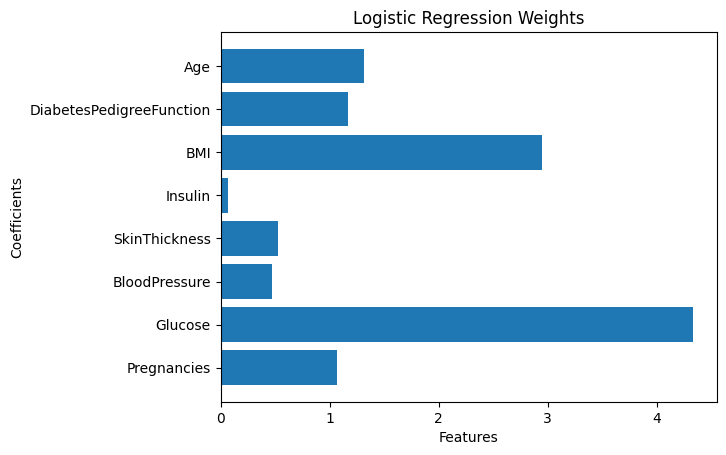

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the scaler
scaler = MinMaxScaler()
# Dont fit the scaler to the initial x or dataframe.
  # First split the data to X_train, X_valid,
  # Then fit the scaler to the X_train and transform only the X_valid to avoid data leakage
  # Then apply the model to the scaled data

# Convert the initial dataframe objects to numpy arrays
x_task10=inputs_df.to_numpy()
y=targets_df.to_numpy()
# Print the scaled numbers to validate the corrected transformation from original values to values between [0,1].

#Split the x_scaled to x_train, x_val, y_train, y_test and then train again the classifier.
seed=0
split_size=0.3
X_train1, X_valid1, y_train1, y_valid1 = train_test_split(x_task10, y, test_size=split_size, random_state=seed)

#Now fit the scaler to the train and transform train and valid.
X_train_scaled= scaler.fit_transform(X_train1)
X_valid_scaled= scaler.transform(X_valid1)

#Use the model and classify the scaled data.
model_scaled= LogisticRegression(max_iter=1000, random_state=seed)
model_scaled.fit(X_train_scaled, y_train1)
predictions_scaled= model_scaled.predict(X_valid_scaled)

# Print the accuracy of the model
accuracy_scaled= accuracy_score(y_valid1, predictions_scaled)
print(f"Accuracy of the model in Test set:: {accuracy_scaled*100:.2f}%")
print("")

# Visualize the feature importance
coeffs= model_scaled.coef_[0]
importance_weights = np.abs(coeffs)
plt.barh(inputs_df.columns, importance_weights)
plt.title('Logistic Regression Weights')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()


**Μέρος 2 - Γραμμική Παλινδρόμηση**

In [ ]:
# Load the necessary regressor and metrics for regression purposes.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the Dataset
# Keep only the (Pregnancies, Blood Pressure, BMI, Age) as X and the target will be the Glucose (numeric value)
# Splits the dataset to 70-30
df1= pd.read_csv("diabetes.csv")
df1=df1[['Pregnancies', 'BloodPressure', 'BMI', 'Age', 'Glucose']] # Keep only the desired values

# Split the DataFrame to X, y
X=df1.drop(columns='Glucose')
y=df1['Glucose']
print(X, y)

#Split the DataFrames X,y to X_train, X_valid, Y_train, y_valid
seed=0
split_ration=0.3
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=split_ration, random_state=seed)


     Pregnancies  BloodPressure   BMI  Age
0              6             72  33.6   50
1              1             66  26.6   31
2              8             64  23.3   32
3              1             66  28.1   21
4              0             40  43.1   33
..           ...            ...   ...  ...
763           10             76  32.9   63
764            2             70  36.8   27
765            5             72  26.2   30
766            1             60  30.1   47
767            1             70  30.4   23

[768 rows x 4 columns] 0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64


**Ερώτημα 2**

Το παρακάτω κελί δημιουργεί ένα αντικείμενο του μοντέλου LinearRegression(), το εφαρμόζει στα δεδομένα, και προβλέπει την γλυκόζη σε άγνωστα δεδομένα του test_set.

Σύμφωνα με τις μετρικές, η **mean squared error = 929**, απίστευτα μεγάλη τιμή, που υποδειλώνει ότι η τιμή της πρόβλεψης διαφέρει σημαντικά με την πραγματική τιμή. Επιπλέον, στις τιμές δεν έχει εφαρμοστεί κάποια κλιμάκωση (scaling), συνεπώς **ο υπολογισμός της συγκεκριμένης μετρικής που υψώνει τις μεταβλητές στο τετράγωνο**, εκτοξεύει την συνολική τιμής της με αποτέλεσμα να μην είναι η κατάλληλη για την αξιολόγησει του μοντέλου μας.

**Η δεύτερη μετρική που δεν υψώνει τις προβλέψεις και τις πραγματικές τιμές στο τετράγωνο, και απλά υπολογίζει την αριθμιτική τους διαφορά, είναι σημαντικά μικρότερη mean_absolute_error=23**, και είναι καταλληλότερη σε

Mean Squared Error: 929.88834927469
Mean Absolute Error: 23.599990462075155



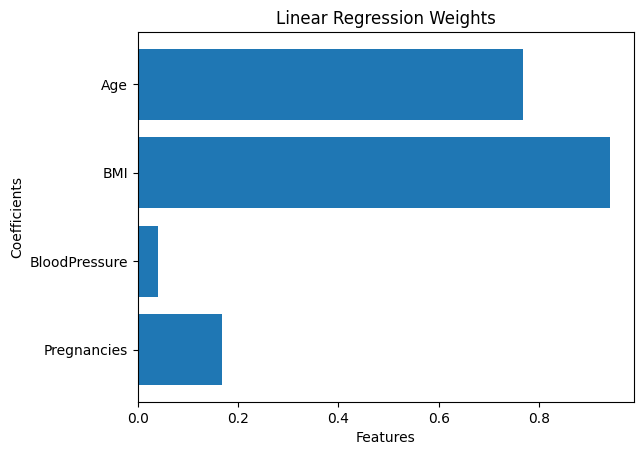

In [ ]:
# Use the regressor to predict the level of the Glucose for each patient/human in the dataset.
#Define the model LinearRegression
regressor = LinearRegression()

# Fit the model to the train set.
regressor.fit(X_train, y_train)

# Calculate the accuracy in the train set with seed=0
Predictions_regressor= regressor.predict(X_valid)

# Calculate the mean_squared_error and mean_absolute_error
mse= mean_squared_error(y_valid, Predictions_regressor)
mae= mean_absolute_error(y_valid, Predictions_regressor)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print("")

# Visualize feature importance
coeffs= regressor.coef_
importance_weights = np.abs(coeffs)
plt.barh(X.columns, importance_weights)
plt.title('Linear Regression Weights')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

**Ερώτημα 3**

Εισάγω τον Lasso regressor, για τις διαφορετικές τιμές του alpha, εκπαιδεύεω το μοντέλο στα δεδομένα, κατόπιν αποθηκεύω τις προβλέψεις και στο τέλος εκτυπώνω την καταλληλότερη μετρική με βάση το προηγούμενο ερώτημα προσδιορίζοντας την απόδοση του μοντέλου.


In [ ]:
#import the Lasso Regression model
from sklearn.linear_model import Lasso
alpha= [0.2, 0.4, 0.6, 0.8, 1.0]
store_predictions=[]

#Define a loop that fit the Lasso to the Dataset
for i in alpha:
  lasso_regressor=Lasso(alpha=i)
  lasso_regressor.fit(X_train,y_train)
  lasso_predictions=lasso_regressor.predict(X_valid)
  lasso_mae= mean_absolute_error(y_valid, lasso_predictions)   # More appropriate metric from previous question.
  store_predictions.append(lasso_mae)
  print(f"Alpha: {i} MAE: {lasso_mae}")

Alpha: 0.2 MAE: 23.5942032912292
Alpha: 0.4 MAE: 23.58841532130485
Alpha: 0.6 MAE: 23.58262934003747
Alpha: 0.8 MAE: 23.576843358770088
Alpha: 1.0 MAE: 23.571057628091296


**Ερώτημα 4**

Σύμφωνα με το ερώτημα 2, το πιο ασήμαντο χαρακτηριστικό για την πρόβλεψη μας είναι το **BloodPressure**, για αυτό θα το αφαραίσουμε και θα πραγματοποιήσουμε την διαδικασία του ερωτήματος 2 ξανά.

Οι μετρικές της απόδοσης του μοντέλου είναι οι **mean_squared_error=932, mean_absolute_error=23**, σύμφωνα με τη συσχέτιση τους με τις προηγούμενες μετρικές, αφαιρόντας το συγκεκριμένο χαρακτηριστικό **οι μετρικές αυξήθηκαν σε απειροέλαχιστο βαθμό συγκεκριμένα το mean_absolute_error, πράγμα που μας υποδηλώνει την μη σημαντικότητα του συγκεκριμένου χαρακτηριστικού στη πρόβλεψη της γλύκοζης ως στόχο (target).** Παρομοίως η mean_squared_error αυξήθηκε κατά τρεις μονάδες, που είναι αναμενόμενο λόγω της μη εφαρμογής κάποια κλιμάκωσης (scaling) στα δεδομένα.

In [ ]:
# Drop the BloodPressure from X DataFrame
X_without_blood_pressure= X.drop(columns='BloodPressure')
y_withot_blood_pressure= y

#Split the DataFrames X,y to X_train, X_valid, Y_train, y_valid
seed=0
split_ration=0.3
X_train_blood_pressure, X_valid_blood_pressure, y_train_blood_pressure, y_valid_blood_pressure = train_test_split(X_without_blood_pressure, y_withot_blood_pressure, test_size=split_ration, random_state=seed)

# Apply the regressor
regressor1 = LinearRegression()

# Fit the model to the train set.
regressor1.fit(X_train_blood_pressure, y_train_blood_pressure)

# Calculate the accuracy in the train set with seed=0
Predictions_regressor_blood_pressure= regressor1.predict(X_valid_blood_pressure)

# Calculate the mean_squared_error and mean_absolute_error
mse= mean_squared_error(y_valid, Predictions_regressor_blood_pressure)
mae= mean_absolute_error(y_valid, Predictions_regressor_blood_pressure)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 932.1503886864979
Mean Absolute Error: 23.615563643141336
